# BMEN 509 - Lab 1

#### Name:
Ibrahim Asad
#### UCID: 
30088413

## Notebook Setup

### Objectives of this lab
1. Understand the imaging basics  
2. Representing images  
    a. Different sensors for imaging (different modalities)
    b. Continuous to discrete domain
3. Image Operations
    a.Histograms and Convolutions

### Section 3 - Image Basics

In [296]:
# Library Imports
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from scipy import signal, ndimage

# Setup Jupyter notebook specifics
%matplotlib inline

# Numpy printing help
np.set_printoptions(precision=2)

In [297]:
# Constants
data_directory = os.path.join('.', 'Data')
file_names = [
    'BreastUltrasound5.tif', 'T1Weighted8.jpg',
    'Thorax_PD.png', 'calcs_grids.tiff',
    'knee_ct2.tif', 'knee_xray2.tif',
    'mri_T2.tif', 'mri_brain.tif',
    'mri_pd.tif'
]

In [298]:
# Verify we can find our files
for file_name in file_names:
    name = os.path.join(data_directory, file_name)
    if not os.path.isfile(name):
        os.sys.exit('Cannot find file {}. Please make sure you have downloaded the data'.format(name))
print('Found all image files!')

Found all image files!


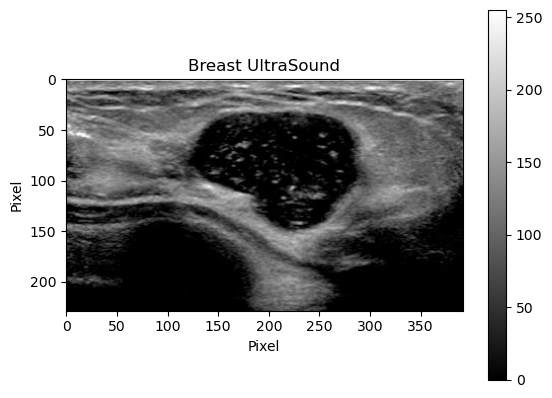

The X and Y Values of the image is: (X,Y), (229, 392)
The following Image has:
89768 pixels

Pixel at (0, 0) is in the top left corner of the image


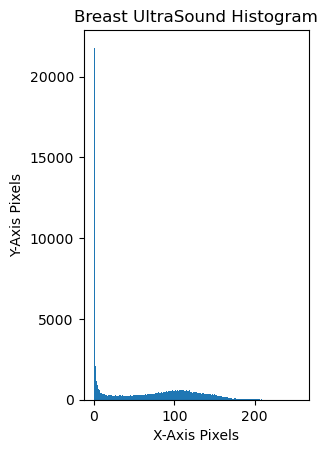

In [299]:
# Loading Image
filename = os.path.join(data_directory, 'BreastUltrasound5.tif')

I = io.imread(filename)

# Display Image
plt.imshow(I, cmap='gray')
# Title, Axis, and Color Bar Added
plt.title("Breast UltraSound")
plt.colorbar(); plt.xlabel('Pixel'); plt.ylabel('Pixel')
plt.show()

#Size of X and Y Dimensions
print('The X and Y Values of the image is: (X,Y), {}'.format(I.shape))

# Let's the properties!
# Pixels
print('The following Image has:')
print('{} pixels\n'.format(np.prod(I.shape)))
print('Pixel at (0, 0) is in the top left corner of the image')


# Histogram with 256 bins
plt.subplot(1, 2, 2); plt.hist(I.ravel(), bins=256); plt.xlabel('X-Axis Pixels'); plt.ylabel('Y-Axis Pixels'); plt.title("Breast UltraSound Histogram")
plt.show()

### Section 4 - Transfer Function


Reading image ./Data/mri_pd.tif


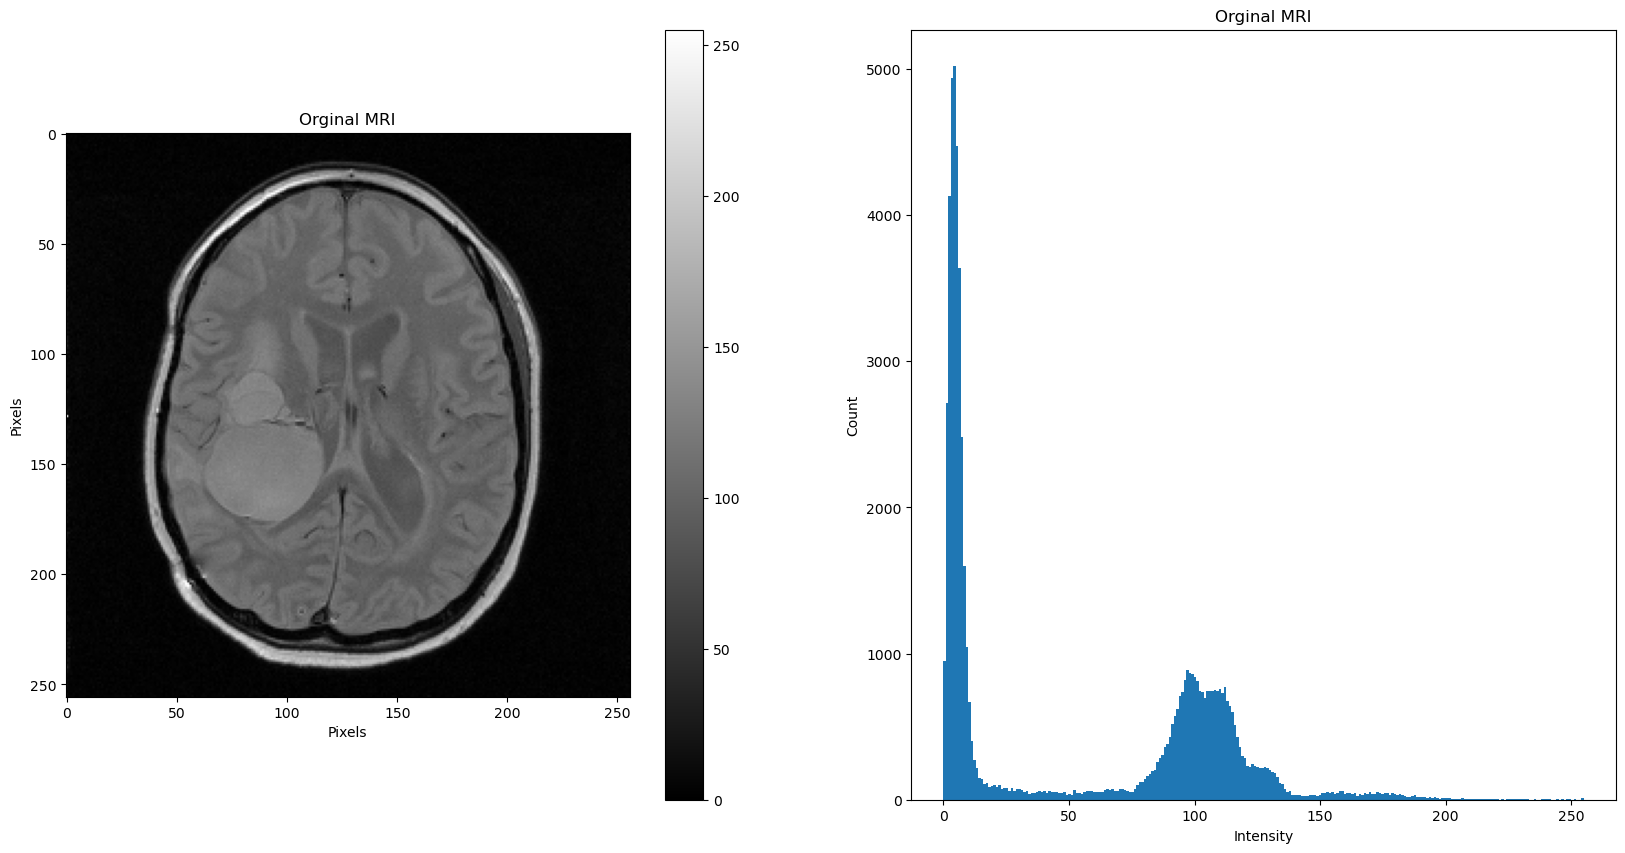

Reading image ./Data/mri_pd.tif


In [300]:
filename = os.path.join(data_directory, 'mri_pd.tif')

print('Reading image {}'.format(filename))
I = io.imread(filename)

#Original 
plt.subplots(1, 2, figsize=(20,10))
plt.subplot(1, 2, 1); plt.imshow(I, cmap='gray'); plt.colorbar(); plt.title('Orginal MRI'); plt.xlabel('Pixels'); plt.ylabel('Pixels')
plt.subplot(1, 2, 2); plt.hist(I.ravel(), bins=256); plt.xlabel('Intensity'); plt.ylabel('Count'); plt.title('Orginal MRI')
plt.show()

filename = os.path.join(data_directory, 'mri_pd.tif')

print('Reading image {}'.format(filename))

I = io.imread(filename)
J = io.imread(filename)
J = J.astype(np.float32)

#Linear Transformation Function
# J(x, y) = m · I(x, y) + b

def mvalue(Window, Max, Min):
    m = (Max - Min) / Window
    return m

def bvalue(Window, Max, Min):
    subtract_value = (Max - Min) / Window
    subtract_value = subtract_value * Max 
    b = Max - subtract_value
    return b

size = (4,3)
def Linear_transform(Window, Level, Ixy):
    
    K = Ixy
    mi = np.min(Ixy[:])
    ma = np.max(Ixy[:])
    m = mvalue(Window, ma, mi)
    b = bvalue(Window, ma, mi)    
    K = (m * K) + b
    
    return K

# Used to Plot the Transformations

def Plot_Line_Transform(name, count, K):
    mi = np.min(J[:])
    ma = np.max(J[:])
    #Change Figure Size
    plt.figure(figsize=(30,30))
    # Plot Image
    plt.subplot(size[0], size[1], 3*(count-1)+1)

    plt.imshow(K, cmap='gray', vmin=mi, vmax=ma)
    plt.colorbar()
    plt.title(name)
    
    # Plot histogram
    plt.subplot(size[0], size[1], 3*(count-1)+1+2)
    plt.hist(K.ravel(), bins=256)
    plt.ylabel('Count') 
    plt.xlabel('Intensity')
    plt.title(name)

Reading image ./Data/mri_pd.tif


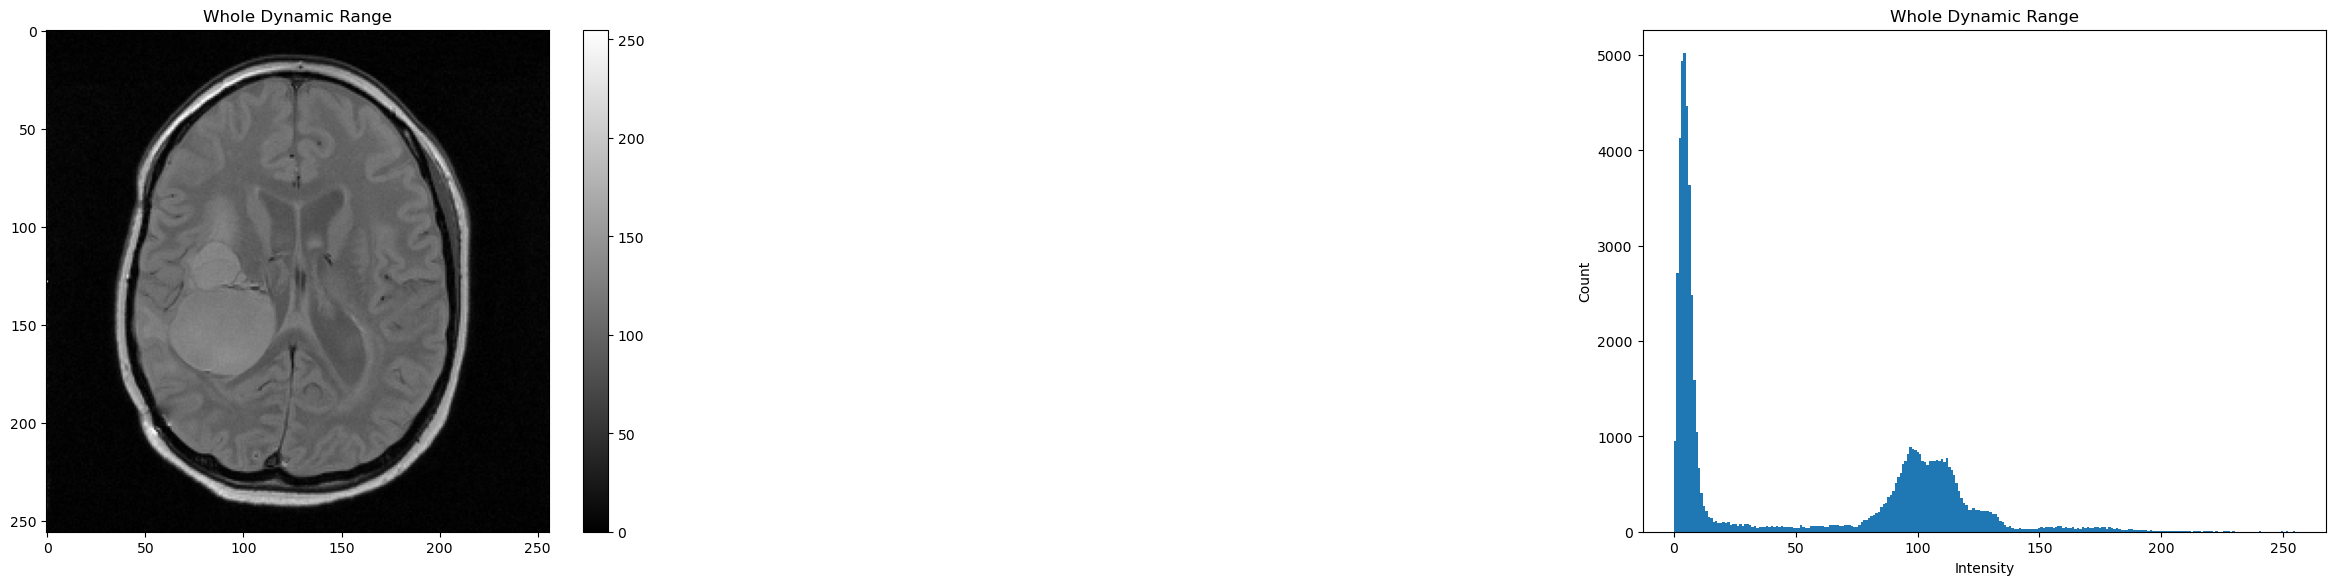

In [301]:
# Whole Dynamic Range Which has a Window value of 255 and Level value of 128
filename = os.path.join(data_directory, 'mri_pd.tif')

print('Reading image {}'.format(filename))
I = io.imread(filename)
I = J
J = J.astype(np.float32)
# To Get Linear Transformation 
K = Linear_transform(255, 128, J).astype(np.uint8)

#Plot Titles
name = 'Whole Dynamic Range'
#Function To Plot
Plot_Line_Transform(name , 1, K)

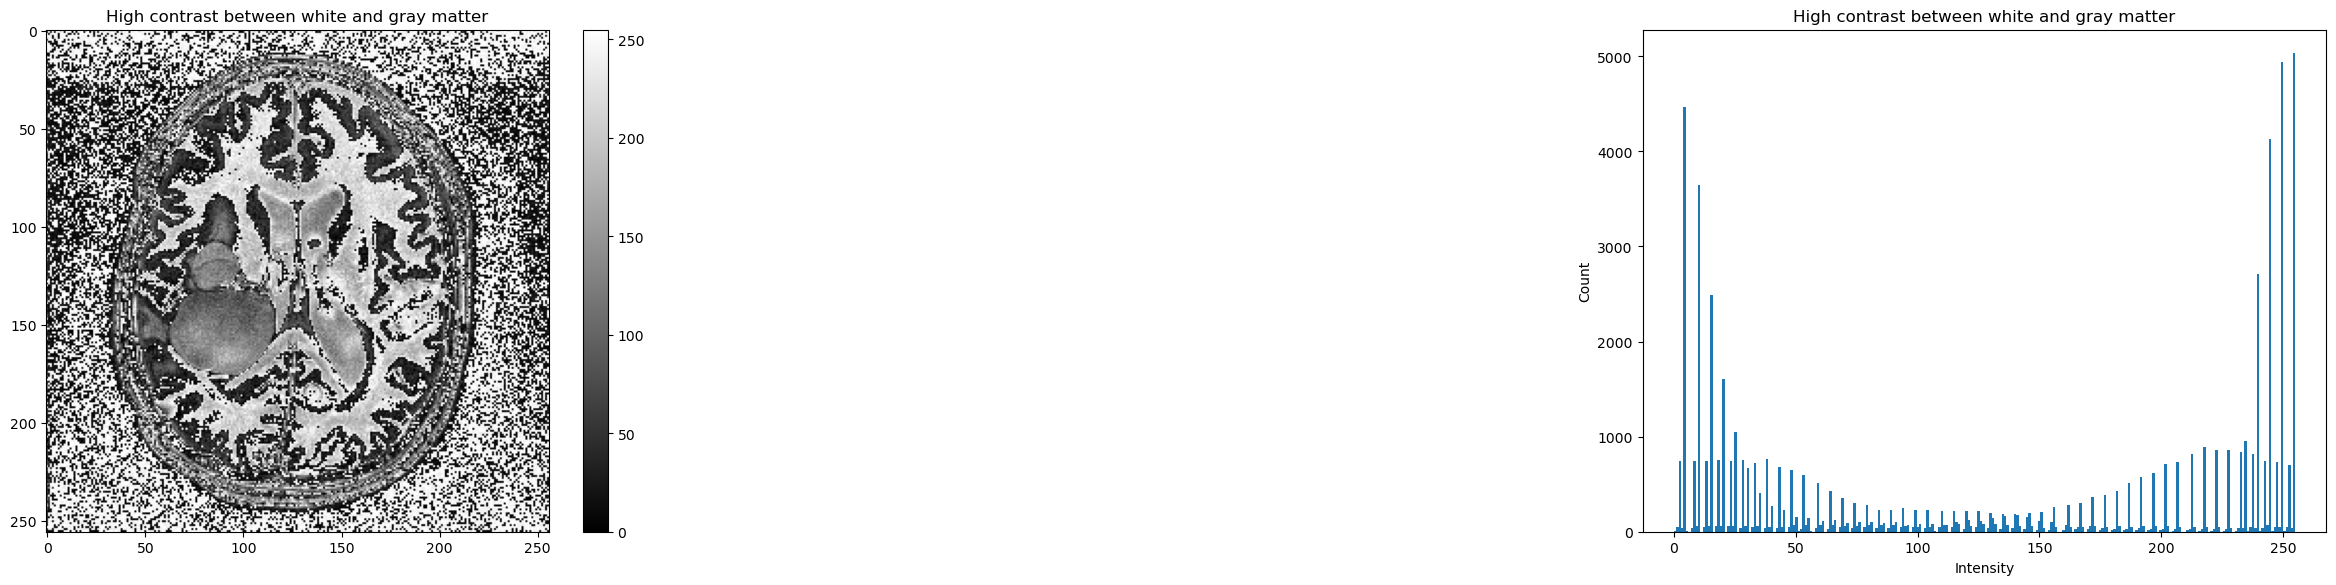

In [302]:
# High contrast between white and gray matter Which has a Window value
# of 50 and Level value of 50



# To Get Linear Transformation 
K = Linear_transform(50, 50, J).astype(np.uint8)
#Plot Titles
name = 'High contrast between white and gray matter'
#Function To Plot
Plot_Line_Transform(name , 2, K)


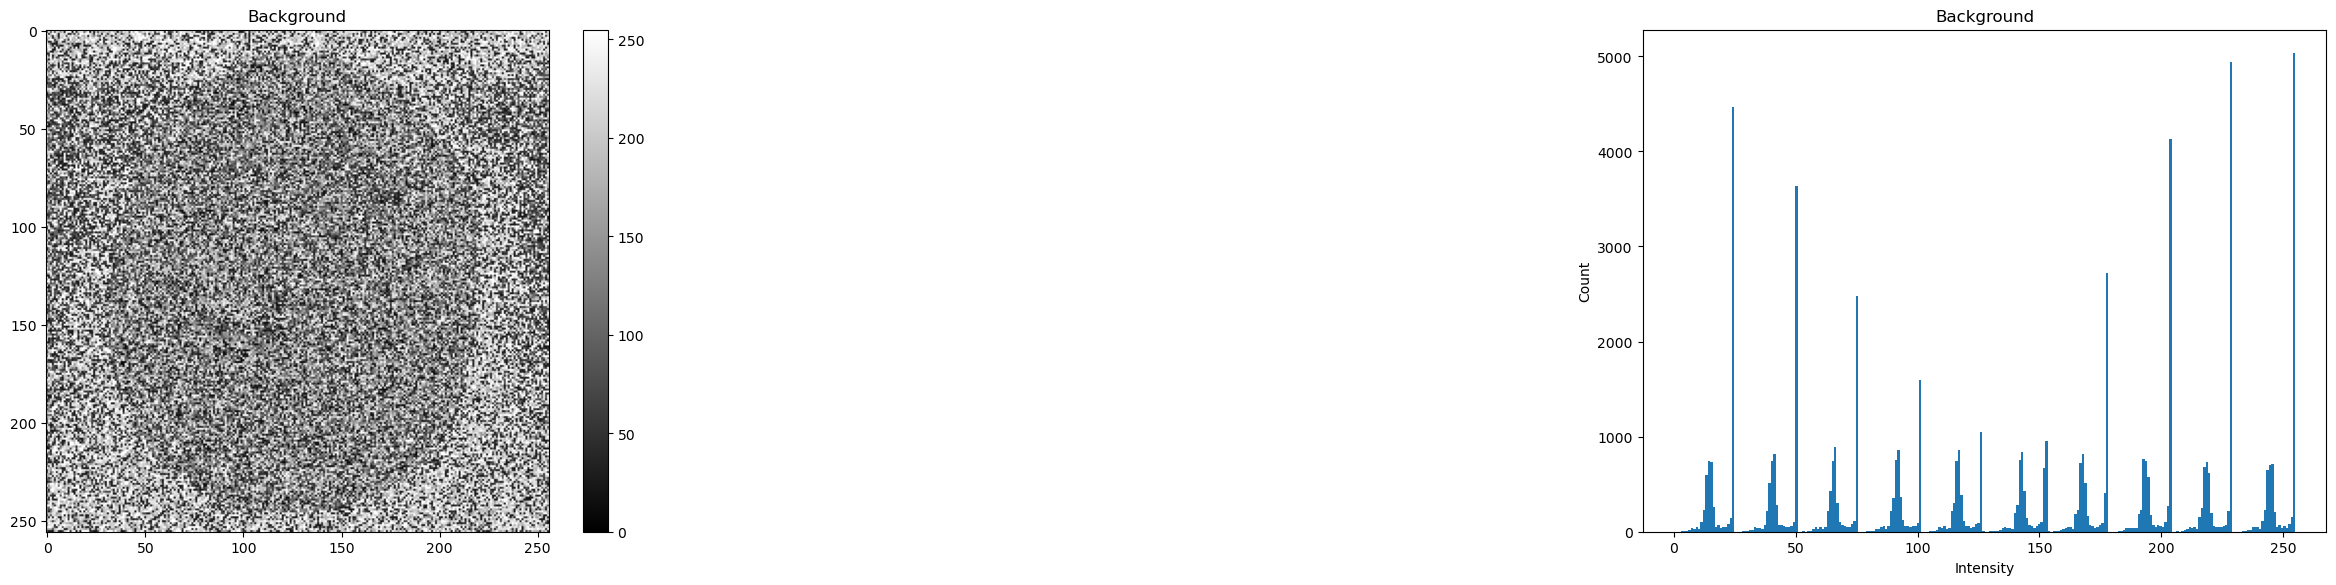

In [303]:
# Background Which has a Window value of 10 and Level value of 20

filename = os.path.join(data_directory, 'mri_pd.tif')


# To Get Linear Transformation 
K = Linear_transform(10, 20, J).astype(np.uint8)
#Plot Titles
name = 'Background'
#Function To Plot
Plot_Line_Transform( name , 3, K)

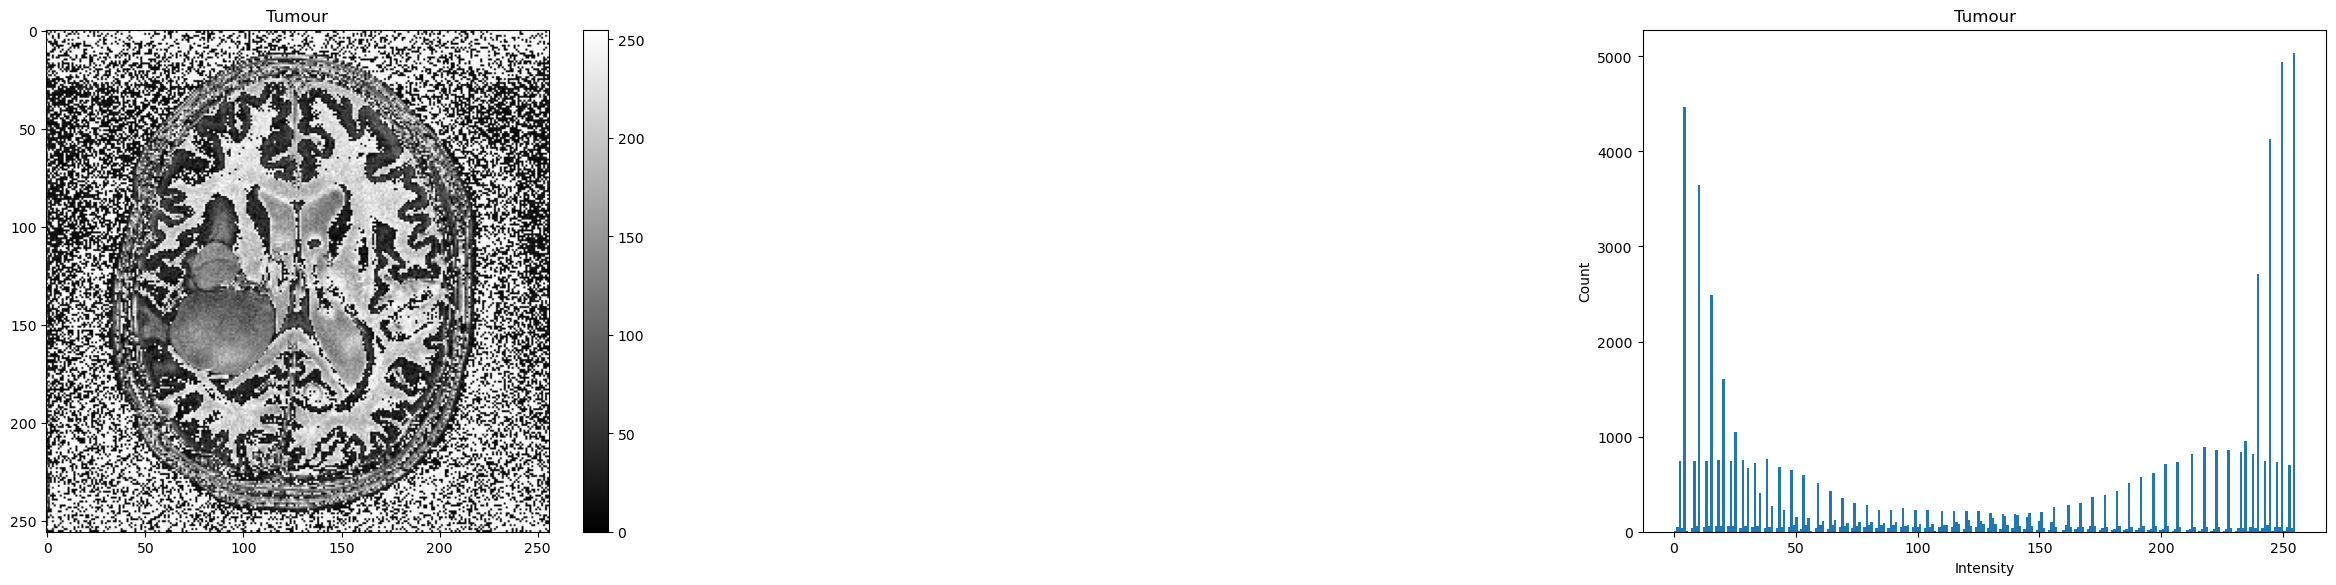

In [304]:
# Tumour has a Window value of 50 and Level value of 100

# To Get Linear Transformation 
K = Linear_transform(50, 100, J).astype(np.uint8)
#Plot Titles
name = 'Tumour'
#Function To Plot
Plot_Line_Transform(name , 4, K)

The values that were changed from the first and second level transformations is the the second level did not have counts that were similar for every intensity rather it was select. At the beginning we can see the count slopes down from 0 to ~125 and slopes back up almost creating a symmetrical histogram as compared to the first window where the slop is deeper and does not reach the same levels of count from 0 to roughly 25 intensity.  From 75 to ~140 intensity there is also a larger more upside parabolic effect of count where the peak roughly is around 1000, however the same range for the intensity can be seen barley have 500 count.

Window and Leveling allows us to see images and sections differently as is it is essentially like a scope where you can refine and add light to the image. When you increase the Level the image will get darker and as you increase Window the image becomes more defined and can see more details in the image. When playing with these two values you are able to get distrinct features.


### Section 5 - Exploring a Gaussian Filter

Images Are 2D Object therefore the original Equation of:

(1/2π(σ^2))exp (-((y-yo)^2)/(2σ^2)) 

It would not work and need to use the 2D Transformation:

(1/2π(σ^2))exp (-(x^2 + y^2)/(2σ^2)) 

where x and y are the distance from the origin such that the equation would be (y-yo) and (x-yo)
which can be found here,

https://www.southampton.ac.uk/~msn/book/new_demo/gaussian/#:~:text=The%20Gaussian%20Smoothing%20Operator%20performs,defines%20the%20amount%20of%20blurring.
https://en.wikipedia.org/wiki/Gaussian_filter

In [398]:
# import math to get the exact value of pi
import math 


# (1/2π(σ^2))exp (-(x^2 + y^2)/(2σ^2)) Apply this on the Filter
def Gauss_Filter(kernel, sigma):
    #Have A Copy of the Kernel Size 
    xy = kernel
    kernel = np.ones((xy,xy))
    # To get Base (1/2π(σ^2))
    base_denom = 2 * math.pi * math.pow(sigma,2)
    base = 1/base_denom
    # To get Exponant (-(x^2 + y^2)/(2σ^2))
    # Exponant Numerator
    
    for x in range(xy):
        for y in range(xy):
            exponant_num = math.pow(x,2) + math.pow(y,2)
            exponant_denom = -(2 * math.pow(sigma,2))
            base_denom = 2 * math.pow(sigma,2) * math.pi
            base = 1/base_denom
            
            exp = exponant_num/exponant_denom
            
            kernel[x][y] = math.pow(base,-exp)
    
    return kernel    


def Display_Kernel(kernel,kernel_size, sigma, I):
    signal.convolve2d(I, kernel, boundary='pad', mode='same')
    print('Knee CT2 Scan for Kernel Size ', kernel_size, ', Sigma Value ', sigma)
    plt.imshow(I, cmap='gray')

    

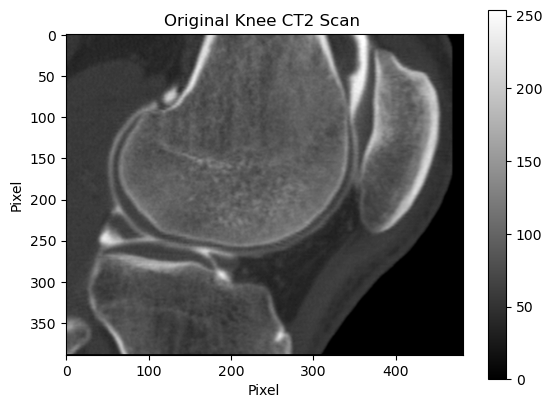

In [399]:
# Loading Image
filename = os.path.join(data_directory, 'knee_ct2.tif')

I = io.imread(filename)

# Display Image
plt.imshow(I, cmap='gray')
# Title, Axis, and Color Bar Added
plt.title("Original Knee CT2 Scan ")
plt.colorbar(); plt.xlabel('Pixel'); plt.ylabel('Pixel')
plt.show()

#### The Next 5 Following Images will have a Sigma Value of 2 and Kernel Values of 3, 5, 6, 21, 51

Knee CT2 Scan for Kernel Size  3 , Sigma Value  2


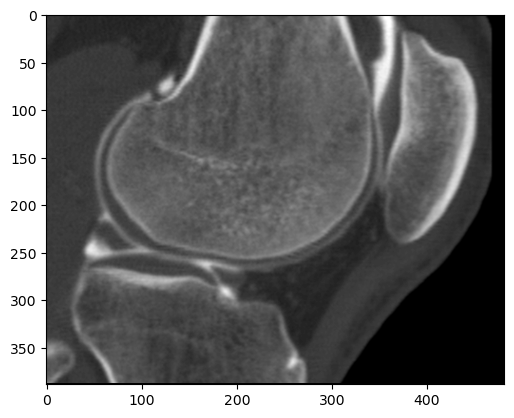

In [401]:
Kernel = Gauss_Filter(3, 2)
Display_Kernel(Kernel, 3, 2, I)

Knee CT2 Scan for Kernel Size  5 , Sigma Value  2


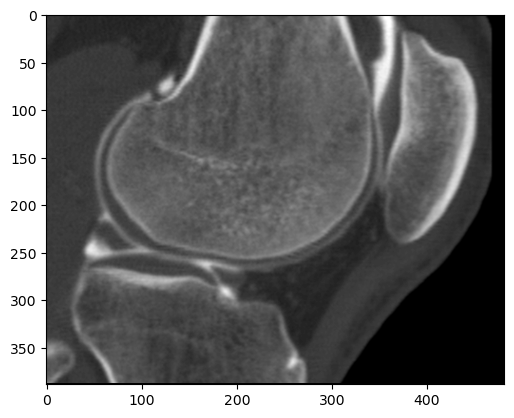

In [402]:
Kernel = Gauss_Filter(5, 2)
Display_Kernel(Kernel, 5, 2, I)

Knee CT2 Scan for Kernel Size  7 , Sigma Value  2


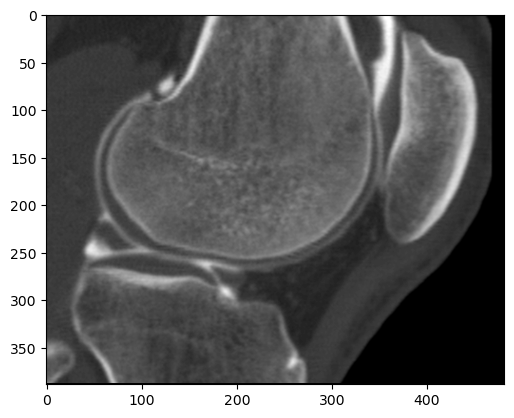

In [403]:
Kernel = Gauss_Filter(7, 2)
Display_Kernel(Kernel, 7, 2, I)

Knee CT2 Scan for Kernel Size  21 , Sigma Value  2


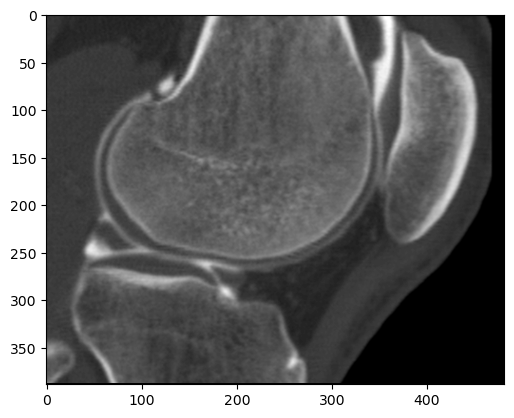

In [404]:
Kernel = Gauss_Filter(21, 2)
Display_Kernel(Kernel, 21, 2, I)

Knee CT2 Scan for Kernel Size  51 , Sigma Value  2


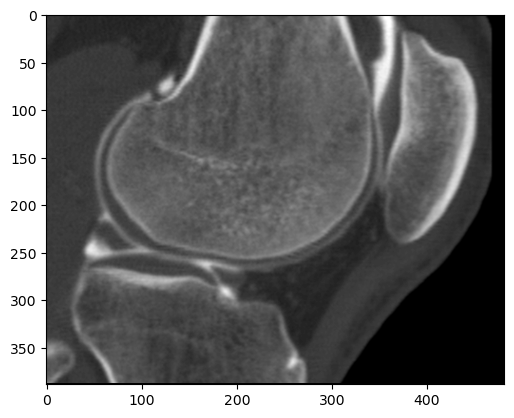

In [405]:
Kernel = Gauss_Filter(51, 2)
Display_Kernel(Kernel, 51, 2, I)

#### The Next 5 Following Images will have a Kernel Value of 21 and Sigma Values of 0.5, 1, 2, 3, 5

Knee CT2 Scan for Kernel Size  21 , Sigma Value  0.5


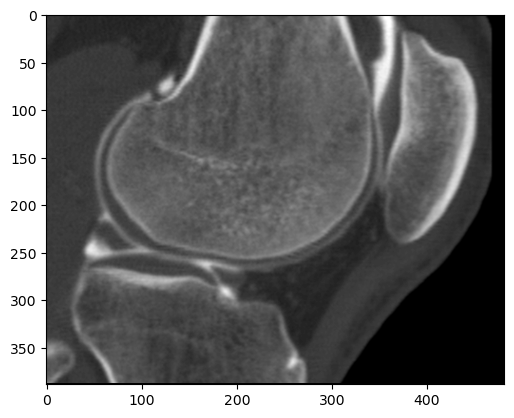

In [406]:
Sigma = Gauss_Filter(21, 0.5)
Display_Kernel(Sigma, 21, 0.5, I)

Knee CT2 Scan for Kernel Size  21 , Sigma Value  1


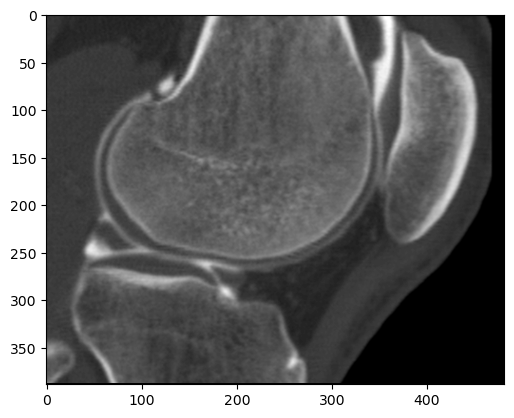

In [407]:
Sigma = Gauss_Filter(21, 1)
Display_Kernel(Sigma, 21, 1, I)

Knee CT2 Scan for Kernel Size  21 , Sigma Value  2


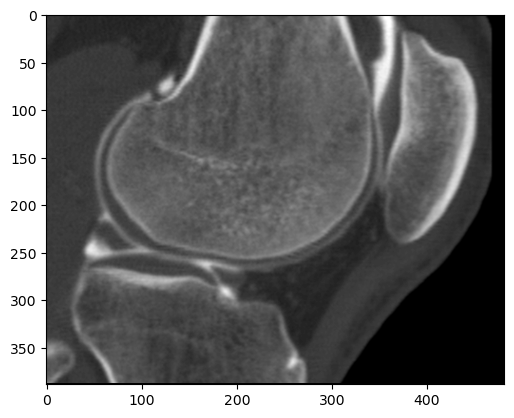

In [408]:
Sigma = Gauss_Filter(21, 2)
Display_Kernel(Sigma, 21, 2, I)

Knee CT2 Scan for Kernel Size  21 , Sigma Value  3


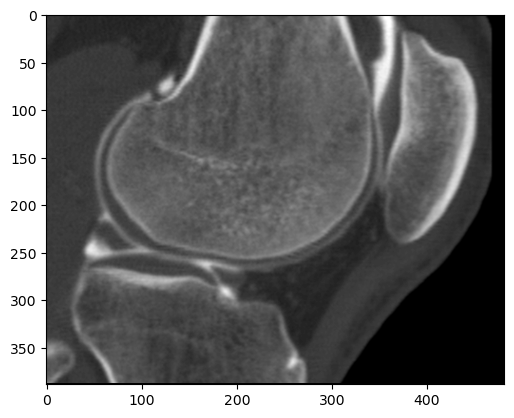

In [409]:
Sigma = Gauss_Filter(21, 3)
Display_Kernel(Sigma, 21, 3, I)

Knee CT2 Scan for Kernel Size  21 , Sigma Value  5


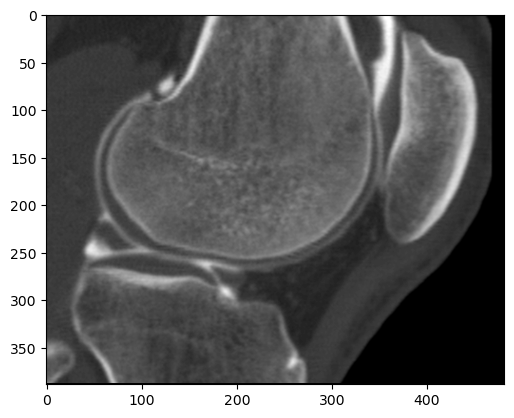

In [410]:
Sigma = Gauss_Filter(21, 5)
Display_Kernel(Sigma, 21, 5, I)

1. ##### What is the effect of increasing the kernel size but keeping sigma const ####
As You increase kernal and keep the sigma constant it would have the opposite effect of as You increase the Sigma and keep the kernel constant. Since you have more "pixels" to work with and therfore the degree would not matter as you increase the volume of pixels. 


2. #### What is the effect of increasing the sigma but keeping the kernel size constant? ####
As You increase the Sigma and keep the kernel constant the image becomes more blurry as the image starts to 
soften given the placements of sigma in the Gaussian Equation 


3. #### Often a Gaussian filter is used to filter noise in an image. How should the parameters (sigma, kernel size) be chosen for filtering noise? ####
If I wanted to remove the noise I would need to reduce the kernal and increase the sigma. Since if I increase the kernel I am refining the image showing more noise then may be intended, so I need to blur the noise as well.


4. #### What is the disadvantage of making the kernel extremely large? ####
Can be large to compute and will take more time to do calculations however it also might show more noise then inteneded. 



### Section 6 - Understanding Signal, Noise, and Contrast

#### Code To Get Point on the image
https://www.geeksforgeeks.org/plot-a-point-or-a-line-on-an-image-with-matplotlib/

In [340]:

# Library Imports
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from scipy import signal, ndimage
import math 
import random
# Setup Jupyter notebook specifics
%matplotlib inline

# Numpy printing help
np.set_printoptions(precision=2)

#Add Salt Pepper
def add_sp(image, density):
    # Image Size since it is a perfect square
    size = int(math.sqrt(image.size))

    #Total Number of Pixels
    np = size * size

    #Get the total Amount of Pixels needed to be changed
    salt_pepper = int(np * density)
    


    salt_or_pepper = 0

    for o in range(salt_pepper):
        #Choose a Random X and Y Value based on the Dimensions and making sure the 
        #X and Y do not go past Image Matrix Boundry
        x = random.randint(0, size-1)
        y = random.randint(0, size-1)

        #Alterates between Black and White
        if salt_or_pepper == 0:
            #salt
            image[x,y] = 255 
            salt_or_pepper = 1
        elif salt_or_pepper == 1:
            #pepper
            image[x,y] = 0
            salt_or_pepper = 0


    return image

def add_Gauss_Noise(image, mean, variance):
    # This Function uses int or tuples of ints which is why you need to use .shape
    image = np.random.normal(mean, variance, image.shape)
    return image



def SNR_CNR(a_x, a_y, b_x, b_y, D):

    plt.plot(a_x, a_y, marker='.',markersize=20, color="red") 
    plt.plot(b_x, b_y, marker='.', markersize=20,color="#AEF309") #Hex Code for Color

    Mean_image = format(np.mean(D))

    Y = np.prod(D.shape)
    # For Signal to Noise Ratio
    SNR = format(np.mean(D)/(np.sqrt(Y / (Y-1) * np.std(D)**2))) #mean / sqrt(unbiased STD)  

    print('For Signal to Noise Ratio: ',SNR)
    D_a = D[a_y,a_x]
    D_b = D[b_y,b_x]

    # For Contrast to Noise Ratio
    #Conrast = |Da - Db|
    CNR = np.abs(D_a - D_b)/(np.sqrt(Y / (Y-1) * np.std(D)**2)) #Contrast / sqrt(unbiased STD)

    print('For Contrast to Noise Ratio: ',CNR)
    plt.imshow(D, cmap='gray') 
    plt.show() 


##### To Obtain The Formula for Gaussian Noise Used the Numpy Library and its predefined function for Gaussian Noise
https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html


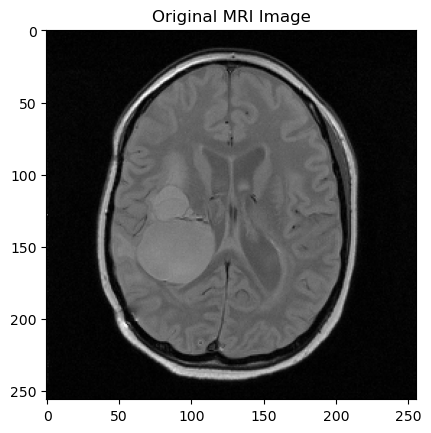

For Signal to Noise Ratio:  0.9980688283991731
For Contrast to Noise Ratio:  0.5239101896763823


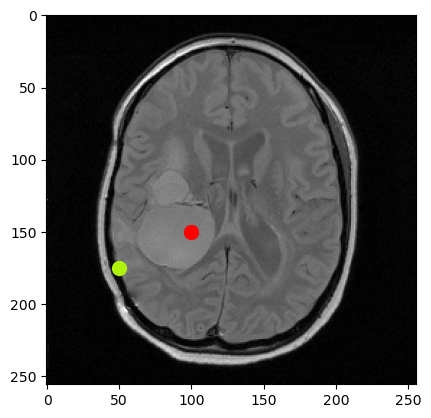

In [341]:

# Library Imports
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from scipy import signal, ndimage
import math 
import random
# Setup Jupyter notebook specifics
%matplotlib inline

# Numpy printing help
np.set_printoptions(precision=2)

#     D_a = D[150,100]
#     D_b = D[175,50]

data_directory = os.path.join('.', 'Data')

filename = os.path.join(data_directory, 'mri_pd.tif')

J = io.imread(filename)
I = io.imread(filename)
size = int(math.sqrt(I.size))
J = add_sp(J, 0.1)

plt.imshow(I, cmap='gray'); plt.title('Original MRI Image')
plt.show()


SNR_CNR(100,150,50,175,I)





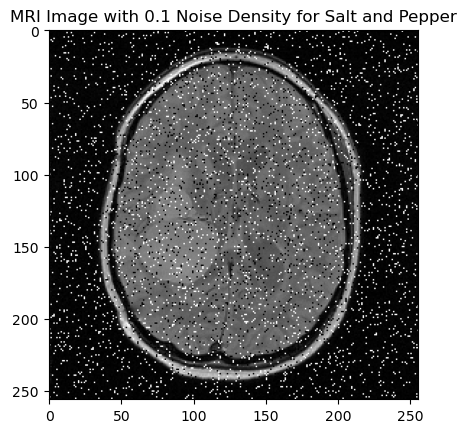

For Signal to Noise Ratio:  0.8903612218519554
For Contrast to Noise Ratio:  0.41279032159962836


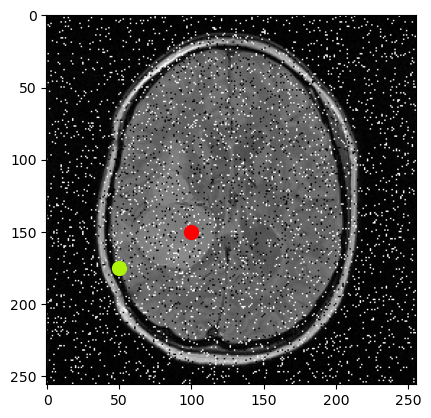

In [342]:
plt.imshow(J, cmap='gray'); plt.title('MRI Image with 0.1 Noise Density for Salt and Pepper')
plt.show()
SNR_CNR(100,150,50,175,J)

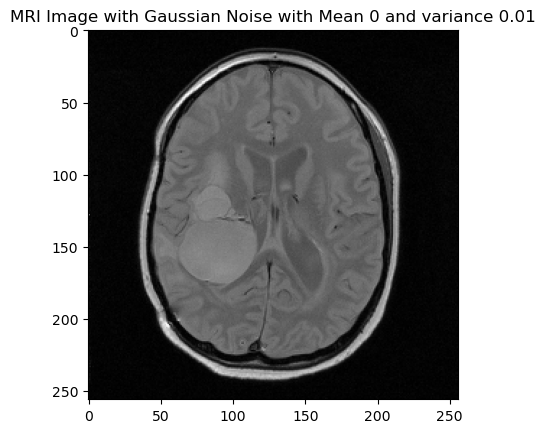

For Signal to Noise Ratio:  0.9980685945041786
For Contrast to Noise Ratio:  0.523442742308135


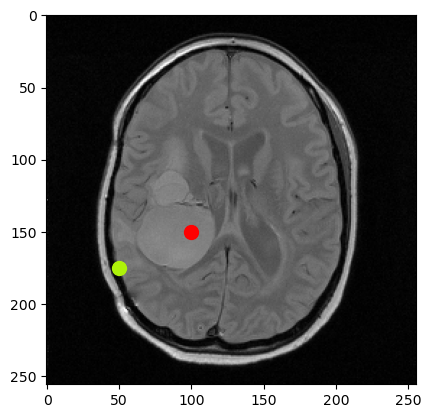

In [343]:
Gaussian_Noise = add_Gauss_Noise(I, 0, 0.01) 
Gaussian_Noise = I + Gaussian_Noise
plt.imshow(Gaussian_Noise, cmap='gray'); plt.title('MRI Image with Gaussian Noise with Mean 0 and variance 0.01')
plt.show()
SNR_CNR(100,150,50,175,Gaussian_Noise)

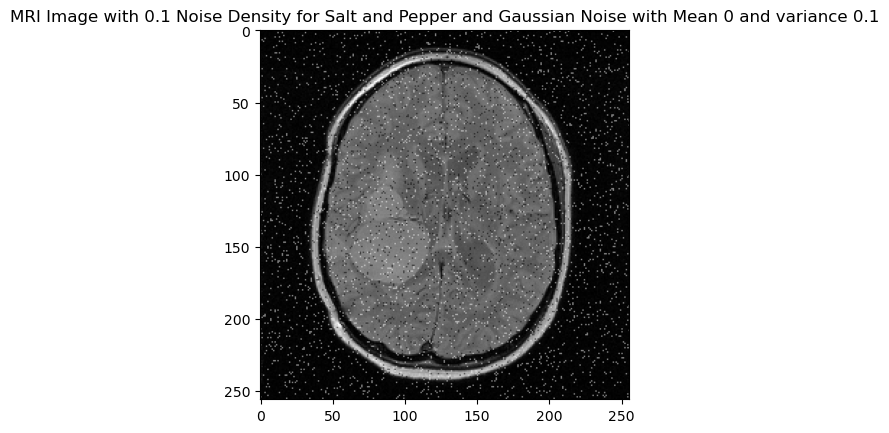

For Signal to Noise Ratio:  1.0125786559451937
For Contrast to Noise Ratio:  0.4983427645194716


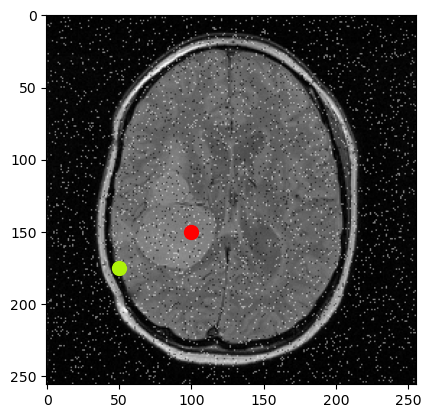

In [344]:
J_sp_gn = J + Gaussian_Noise

plt.imshow(J_sp_gn, cmap='gray'); plt.title('MRI Image with 0.1 Noise Density for Salt and Pepper and Gaussian Noise with Mean 0 and variance 0.1')
plt.show()
SNR_CNR(100,150,50,175,J_sp_gn)

##### To Obtain The Formula for Gaussian Filer Used the SciPy Library and its predefined function for Gaussian Filter
https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.gaussian_filter.html

#### To Obtain The Formula for Median Filter Used the SciPy Library and its predefined function for Median Filter

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.medfilt2d.html#scipy.signal.medfilt2d
https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.medfilt2d.html

In [345]:
# Salt Pepper
from scipy.ndimage import gaussian_filter
from scipy import signal

result_gaus = gaussian_filter(J, sigma=3)
pop = result_gaus + J
snap = ndimage.median_filter(J, size) + J
crackle = snap + pop

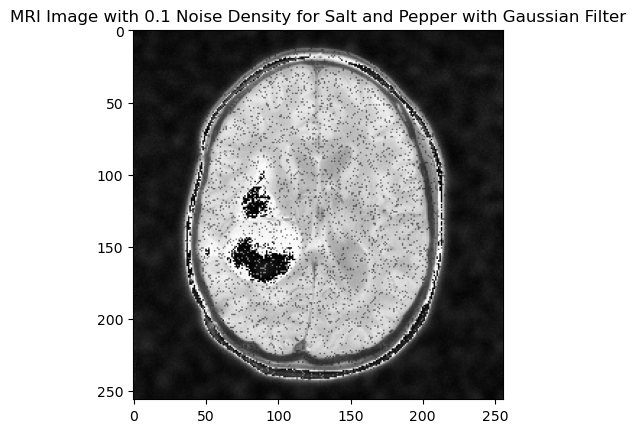

For Signal to Noise Ratio:  1.1271032461387014
For Contrast to Noise Ratio:  0.9267233962418306


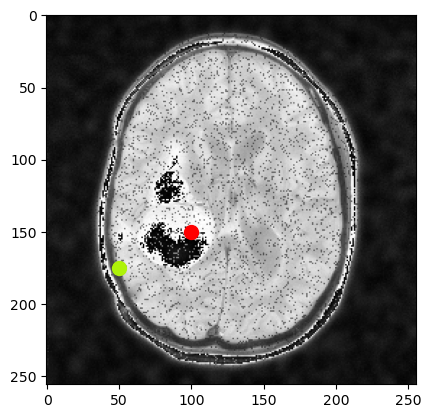

In [346]:
plt.imshow(pop, cmap='gray'); plt.title('MRI Image with 0.1 Noise Density for Salt and Pepper with Gaussian Filter')
plt.show()
SNR_CNR(100,150,50,175,pop)

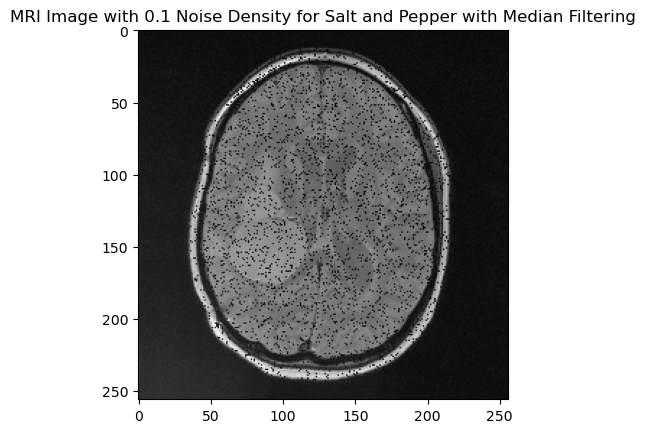

For Signal to Noise Ratio:  1.2227725918686825
For Contrast to Noise Ratio:  0.37682296808588484


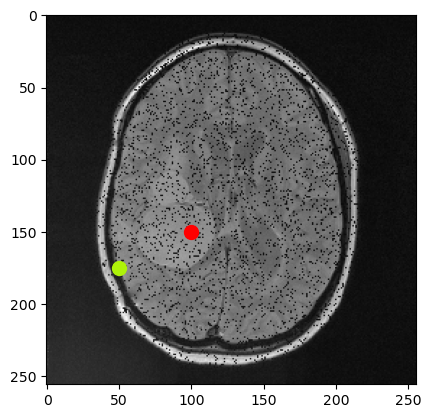

In [347]:
plt.imshow(snap, cmap='gray'); plt.title('MRI Image with 0.1 Noise Density for Salt and Pepper with Median Filtering')
plt.show()
SNR_CNR(100,150,50,175,snap)

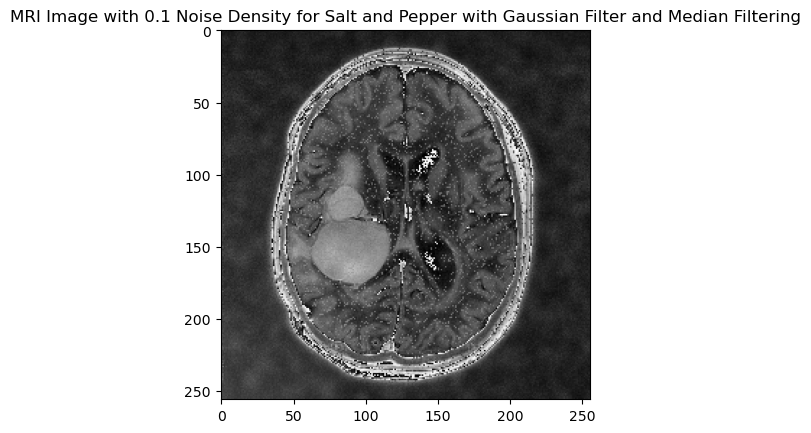

For Signal to Noise Ratio:  1.492331118804972
For Contrast to Noise Ratio:  2.161449398837053


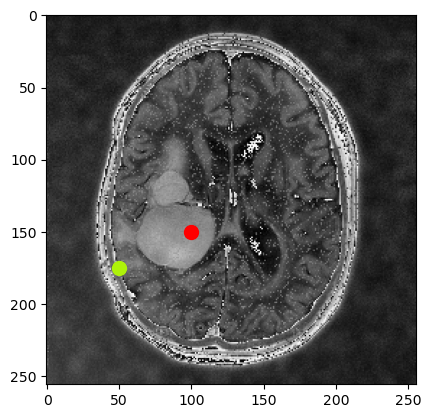

In [348]:
plt.imshow(crackle, cmap='gray'); plt.title('MRI Image with 0.1 Noise Density for Salt and Pepper with Gaussian Filter and Median Filtering')
plt.show()
SNR_CNR(100,150,50,175,crackle)

In [349]:
# Gaussian
from scipy.ndimage import gaussian_filter
from scipy import signal

result_gaus_gaus = gaussian_filter(Gaussian_Noise, sigma=3)
alpha = result_gaus_gaus + Gaussian_Noise

mega = ndimage.median_filter(Gaussian_Noise, size)
omega = alpha + mega





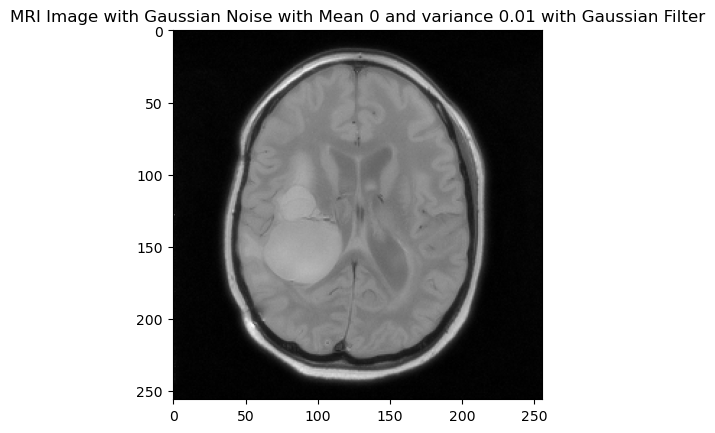

For Signal to Noise Ratio:  1.0794347897358012
For Contrast to Noise Ratio:  0.8144045648891646


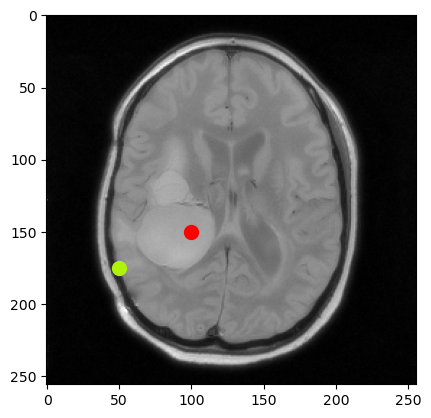

In [350]:
plt.imshow(alpha, cmap='gray'); plt.title('MRI Image with Gaussian Noise with Mean 0 and variance 0.01 with Gaussian Filter')
plt.show()
SNR_CNR(100,150,50,175,alpha)


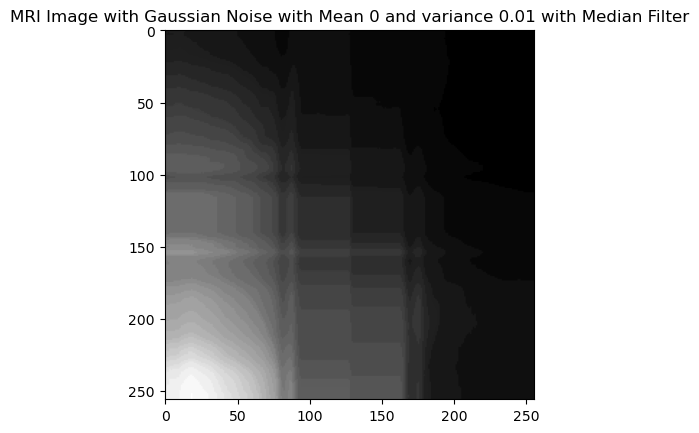

For Signal to Noise Ratio:  2.4395789436425614
For Contrast to Noise Ratio:  1.1698149770824604


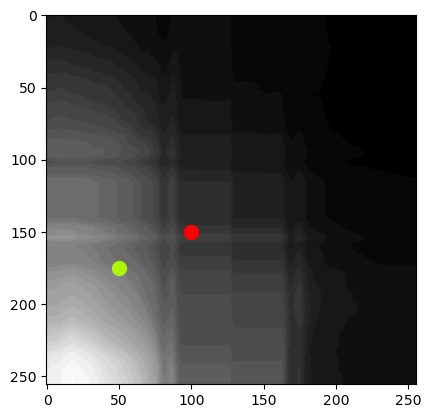

In [351]:
plt.imshow(mega, cmap='gray'); plt.title('MRI Image with Gaussian Noise with Mean 0 and variance 0.01 with Median Filter')
plt.show()
SNR_CNR(100,150,50,175,mega)


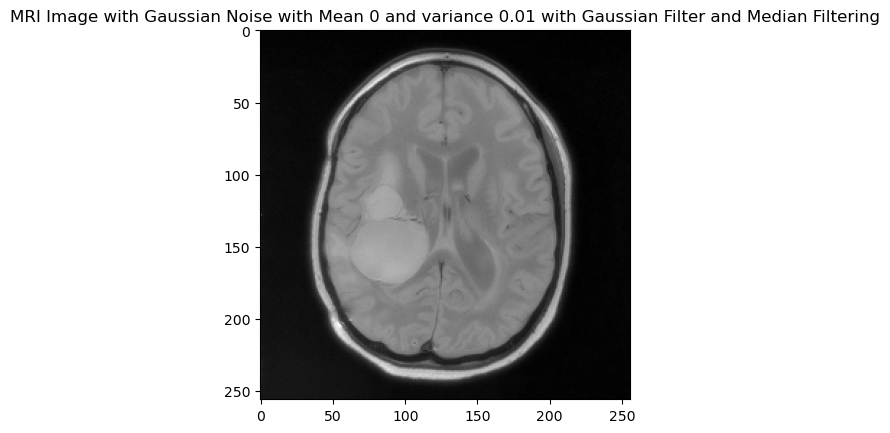

For Signal to Noise Ratio:  1.2520241980636762
For Contrast to Noise Ratio:  0.7357812519229048


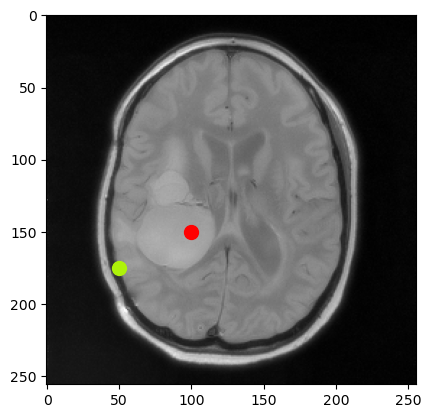

In [352]:
plt.imshow(omega, cmap='gray'); plt.title('MRI Image with Gaussian Noise with Mean 0 and variance 0.01 with Gaussian Filter and Median Filtering')
plt.show()
SNR_CNR(100,150,50,175,omega)


1. ##### Qualitatively compare the original image to the Gaussian and salt and pepper noise images. What is the difference between Gaussian noise and salt and pepper noise? ##### 

The difference bewteen Gaussian noise and salt and pepper noise is that the salt and pepper simply adds white and black pixels where the Gaussian noise will blur the pixels to soften the image. 


2. ##### Compare the median and Gaussian filtered salt and pepper noise images. Which filter produced the best CNR? Which filter produced the best SNR? From the perspective of a radiologist, which filter produced a qualitatively better image? ##### 

The Median Filter produced the image with the best SNR with the Gaussian Filter having the better CNR. dependednt on what is being looked at or for the Gaussian clearly indicates the location of a Tumor however if the radiologist is trying to see the overall brain with the tumor then the Gaussian Noise would be the best and would more likey be used. 


3. ##### Compare the median and Gaussian filtered Gaussian noise images. Which filter produced the best CNR? Which filter produced the best SNR? From the perspective of a radiologist, which filter produced a qualitatively better image? ##### 

The Median Filter produced both the best SNR and CNR results, however it is unusable as it not showing the brain therfore Tthe Gaussian Filter is preffered to be used. 


4. ##### Does the best qualitative result always agree with the best numerical result? Why is it wise to visualize your images and not just rely on metrics? ##### 

The Best SNR and CNR were both produced by the Salt and Pepper Noise image, however dependent on what the radiologist is trying to see such as the tumor then the Salt and Pepper would be best as it clearly indicates the location however if the radiologist is trying to see the overall brain with the tumor then the Gaussian Noise would be the best and would more likey be used. 